In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 간단한 시계열 데이터 만들기

- 정상시계열(우연 변동 시계열)

In [2]:
dd = np.array([1342, 1442, 1252, 1353, 1425, 1462, 1256, 1273, 1242, 1359, 1412, 1252, 1201, 1467, 1322, 1406, 1234, 1290, 1406, 1208]).reshape(5,4)
dd

array([[1342, 1442, 1252, 1353],
       [1425, 1462, 1256, 1273],
       [1242, 1359, 1412, 1252],
       [1201, 1467, 1322, 1406],
       [1234, 1290, 1406, 1208]])

In [3]:
dd_ts = pd.DataFrame(dd, index = range(2016, 2021), columns = ['Qt1', 'Qt2', 'Qt3','Qt4'])
dd_ts

,Qt1,Qt2,Qt3,Qt4
2016,1342,1442,1252,1353
2017,1425,1462,1256,1273
2018,1242,1359,1412,1252
2019,1201,1467,1322,1406
2020,1234,1290,1406,1208


- 데이터 프레임 dd_ts의 행과 열을 stack 방식으로 변환하고 인덱스 초기화

In [4]:
dd_ts = dd_ts.stack().reset_index()
dd_ts

,level_0,level_1,0
0,2016,Qt1,1342
1,2016,Qt2,1442
2,2016,Qt3,1252
3,2016,Qt4,1353
4,2017,Qt1,1425
5,2017,Qt2,1462
6,2017,Qt3,1256
7,2017,Qt4,1273
8,2018,Qt1,1242
9,2018,Qt2,1359


In [5]:
dd_ts.columns = ['year', 'quarter', 'value']
dd_ts

,year,quarter,value
0,2016,Qt1,1342
1,2016,Qt2,1442
2,2016,Qt3,1252
3,2016,Qt4,1353
4,2017,Qt1,1425
5,2017,Qt2,1462
6,2017,Qt3,1256
7,2017,Qt4,1273
8,2018,Qt1,1242
9,2018,Qt2,1359


In [6]:
dd_ts['year'] = dd_ts['year'].apply(str)

In [7]:
dd_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     20 non-null     object
 1   quarter  20 non-null     object
 2   value    20 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 528.0+ bytes


In [8]:
dd_ts['date'] = dd_ts['year'] + dd_ts['quarter']

In [9]:
dd_ts['date'] = dd_ts['date'].str.replace('t', '')
dd_ts

,year,quarter,value,date
0,2016,Qt1,1342,2016Q1
1,2016,Qt2,1442,2016Q2
2,2016,Qt3,1252,2016Q3
3,2016,Qt4,1353,2016Q4
4,2017,Qt1,1425,2017Q1
5,2017,Qt2,1462,2017Q2
6,2017,Qt3,1256,2017Q3
7,2017,Qt4,1273,2017Q4
8,2018,Qt1,1242,2018Q1
9,2018,Qt2,1359,2018Q2


- date 컬럼을 분기 주기로 변환 후 타임스탬프 형식으로 변경

In [10]:
pd.PeriodIndex(dd_ts['date'], freq = 'Q')

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4',
             '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2',
             '2020Q3', '2020Q4'],
            dtype='period[Q-DEC]', name='date')

In [11]:
pd.PeriodIndex(dd_ts['date'], freq = 'Q').to_timestamp()

DatetimeIndex(['2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01'],
              dtype='datetime64[ns]', name='date', freq='QS-OCT')

In [12]:
dd_ts['date'] = pd.PeriodIndex(dd_ts['date'], freq = 'Q').to_timestamp()

In [13]:
dd_ts

,year,quarter,value,date
0,2016,Qt1,1342,2016-01-01
1,2016,Qt2,1442,2016-04-01
2,2016,Qt3,1252,2016-07-01
3,2016,Qt4,1353,2016-10-01
4,2017,Qt1,1425,2017-01-01
5,2017,Qt2,1462,2017-04-01
6,2017,Qt3,1256,2017-07-01
7,2017,Qt4,1273,2017-10-01
8,2018,Qt1,1242,2018-01-01
9,2018,Qt2,1359,2018-04-01


In [14]:
dd_ts = dd_ts.set_index('date')
dd_ts

,year,quarter,value
date,,,
2016-01-01,2016,Qt1,1342
2016-04-01,2016,Qt2,1442
2016-07-01,2016,Qt3,1252
2016-10-01,2016,Qt4,1353
2017-01-01,2017,Qt1,1425
2017-04-01,2017,Qt2,1462
2017-07-01,2017,Qt3,1256
2017-10-01,2017,Qt4,1273
2018-01-01,2018,Qt1,1242


<Axes: xlabel='date'>

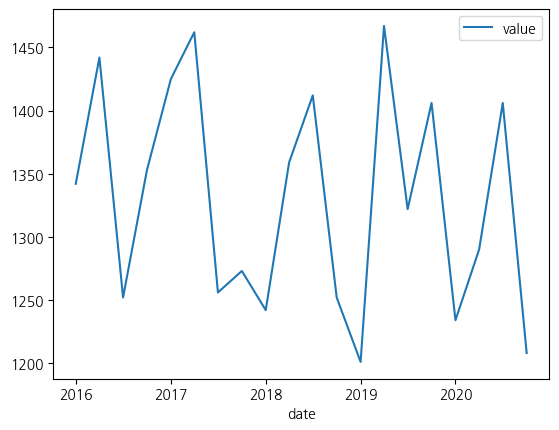

In [15]:
# 시계열 데이터 시각화
sns.lineplot(dd_ts)

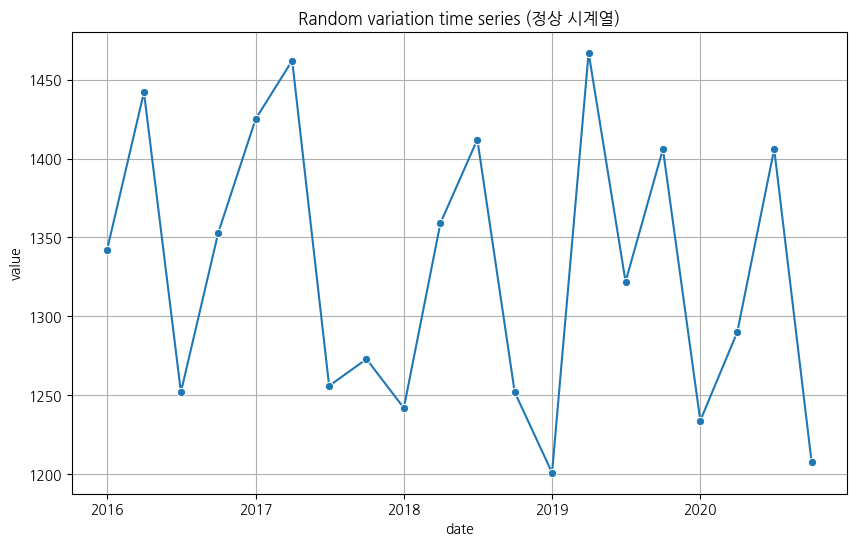

In [16]:
# 시계열 데이터 시각화
plt.figure(figsize = (10, 6))
sns.lineplot(x = dd_ts.index, y = dd_ts['value'], marker = 'o')
plt.title('Random variation time series (정상 시계열)')
plt.xlabel('date')
plt.ylabel('value')
plt.grid(True)
plt.show()

- 주기를 타지 않는 제품의 생산량, 판매량 데이터, 짧은 기간의 주가 데이터, 금리 등이 이와 같은 성향을 갖는다.

# 계절 변동 시계열 (seasonality)

In [17]:
season1 = np.array((1142, 1242, 1452, 1543,
                   1125,1262,1456,1572,
                   1143,1269,1462,1553,
                   1121,1258,1472,1546,
                   1154,1249,1477,1548)).reshape(5,4)

In [18]:
season1_ts = pd.DataFrame(season1, index = range(2016, 2021), columns = ['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'])
season1_ts

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1142,1242,1452,1543
2017,1125,1262,1456,1572
2018,1143,1269,1462,1553
2019,1121,1258,1472,1546
2020,1154,1249,1477,1548


In [19]:
season1_ts = season1_ts.stack().reset_index()
season1_ts

,level_0,level_1,0
0,2016,Qtr1,1142
1,2016,Qtr2,1242
2,2016,Qtr3,1452
3,2016,Qtr4,1543
4,2017,Qtr1,1125
5,2017,Qtr2,1262
6,2017,Qtr3,1456
7,2017,Qtr4,1572
8,2018,Qtr1,1143
9,2018,Qtr2,1269


In [20]:
season1_ts.columns = ['year', 'quarter', 'value']
season1_ts.head(2)

,year,quarter,value
0,2016,Qtr1,1142
1,2016,Qtr2,1242


In [21]:
season1_ts['year'] = season1_ts['year'].apply(str)
season1_ts['year'].dtype

dtype('O')

In [22]:
season1_ts['date'] = season1_ts['year'] + season1_ts['quarter']
season1_ts['date'] = season1_ts['date'].str.replace('tr', '')
season1_ts.head()

,year,quarter,value,date
0,2016,Qtr1,1142,2016Q1
1,2016,Qtr2,1242,2016Q2
2,2016,Qtr3,1452,2016Q3
3,2016,Qtr4,1543,2016Q4
4,2017,Qtr1,1125,2017Q1


In [23]:
season1_ts['date'] = pd.PeriodIndex(season1_ts['date'], freq = 'Q').to_timestamp()
season1_ts.head()

,year,quarter,value,date
0,2016,Qtr1,1142,2016-01-01
1,2016,Qtr2,1242,2016-04-01
2,2016,Qtr3,1452,2016-07-01
3,2016,Qtr4,1543,2016-10-01
4,2017,Qtr1,1125,2017-01-01


In [24]:
season1_ts = season1_ts.set_index('date')
season1_ts

,year,quarter,value
date,,,
2016-01-01,2016,Qtr1,1142
2016-04-01,2016,Qtr2,1242
2016-07-01,2016,Qtr3,1452
2016-10-01,2016,Qtr4,1543
2017-01-01,2017,Qtr1,1125
2017-04-01,2017,Qtr2,1262
2017-07-01,2017,Qtr3,1456
2017-10-01,2017,Qtr4,1572
2018-01-01,2018,Qtr1,1143


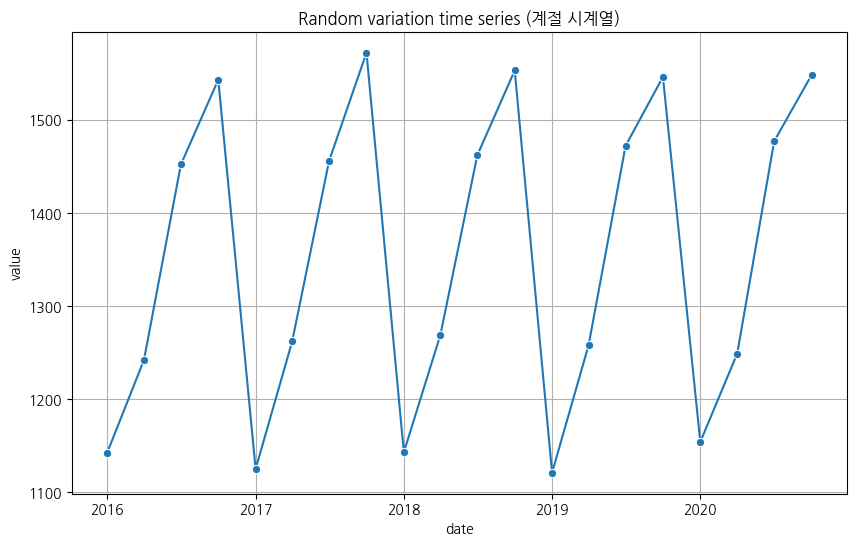

In [25]:
# 계절 시계열 데이터 시각화
plt.figure(figsize = (10, 6))
sns.lineplot(x = season1_ts.index, y = season1_ts['value'], marker = 'o')
plt.title('Random variation time series (계절 시계열)')
plt.xlabel('date')
plt.ylabel('value')
plt.grid(True)
plt.show()

# 추세변동 시계열

In [26]:
trend = np.array((1142, 1242, 1252, 1343,
                    1225, 1562, 1356, 1572,
                    1343, 1459, 1412, 1453,
                    1401, 1478, 1322, 1606,
                    1554, 1589, 1597, 1408) ).reshape(5,4)
trend_ts = pd.DataFrame(trend, index=range(2016, 2021), columns=['Qtr1', 'Qtr2','Qtr3','Qtr4'])
trend_ts = trend_ts.stack().reset_index()
display(trend_ts)

,level_0,level_1,0
0,2016,Qtr1,1142
1,2016,Qtr2,1242
2,2016,Qtr3,1252
3,2016,Qtr4,1343
4,2017,Qtr1,1225
5,2017,Qtr2,1562
6,2017,Qtr3,1356
7,2017,Qtr4,1572
8,2018,Qtr1,1343
9,2018,Qtr2,1459


In [27]:
trend_ts.columns = ['year', 'quarter', 'value']
trend_ts['year'] = trend_ts['year'].apply(str)
trend_ts['date'] = trend_ts['year'] + trend_ts['quarter']
trend_ts['date'] = trend_ts['date'].str.replace('tr', '')
trend_ts['date'] = pd.PeriodIndex(trend_ts['date'], freq = 'Q').to_timestamp()
trend_ts = trend_ts.set_index('date')

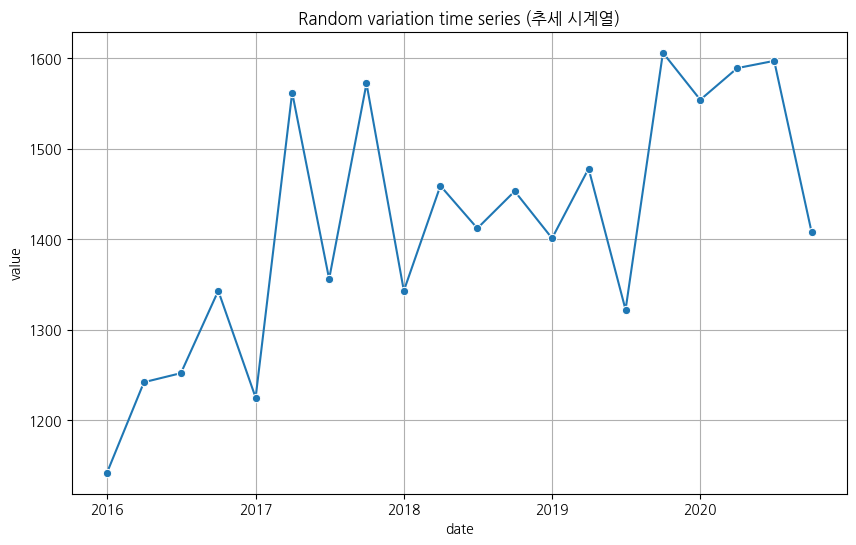

In [28]:
# 계절 시계열 데이터 시각화
plt.figure(figsize = (10, 6))
sns.lineplot(x = trend_ts.index, y = trend_ts['value'], marker = 'o')
plt.title('Random variation time series (추세 시계열)')
plt.xlabel('date')
plt.ylabel('value')
plt.grid(True)
plt.show()

- 예시 : 물가 데이터, 희소 원자재 가격 데이터, 대부분의 주가 지수 데이터

# 계절적 추세변동 시계열 데이터

In [29]:
st1 = np.array([1142, 1242, 1452, 1543,
                1225, 1362, 1556, 1672,
                1343, 1459, 1662, 1753,
                1421, 1558, 1772, 1846,
                1554, 1649, 1877, 1948])

In [30]:
# 시계열 데이터의 인덱스를 2016년 1분기부터 시작해 분기별로 생성
index = pd.date_range(start='2016Q1', periods=len(st1), freq='QE')
st1_ts = pd.Series(st1, index=index)

In [31]:
st1_ts

2016-03-31    1142
2016-06-30    1242
2016-09-30    1452
2016-12-31    1543
2017-03-31    1225
2017-06-30    1362
2017-09-30    1556
2017-12-31    1672
2018-03-31    1343
2018-06-30    1459
2018-09-30    1662
2018-12-31    1753
2019-03-31    1421
2019-06-30    1558
2019-09-30    1772
2019-12-31    1846
2020-03-31    1554
2020-06-30    1649
2020-09-30    1877
2020-12-31    1948
Freq: QE-DEC, dtype: int32

In [32]:
st1_ts[0]

C:\Users\5-08\AppData\Local\Temp\ipykernel_5872\3314587497.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  st1_ts[0]


1142

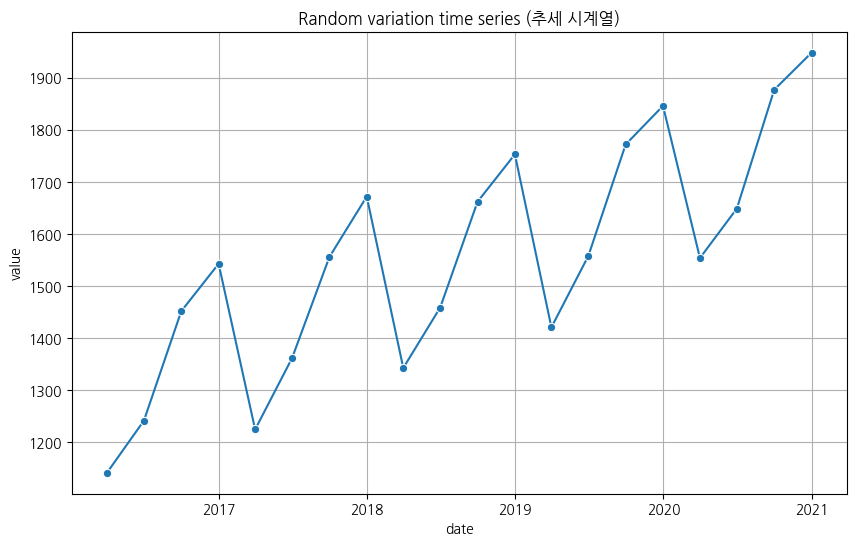

In [33]:
# 계절 시계열 데이터 시각화
plt.figure(figsize = (10, 6))
sns.lineplot(x = st1_ts.index, y = st1_ts.values, marker = 'o')
plt.title('Random variation time series (추세 시계열)')
plt.xlabel('date')
plt.ylabel('value')
plt.grid(True)
plt.show()

# 여러가지 시계열 데이터 모아 보기

Text(0.5, 1.0, '계절 추세 변동 시계열')

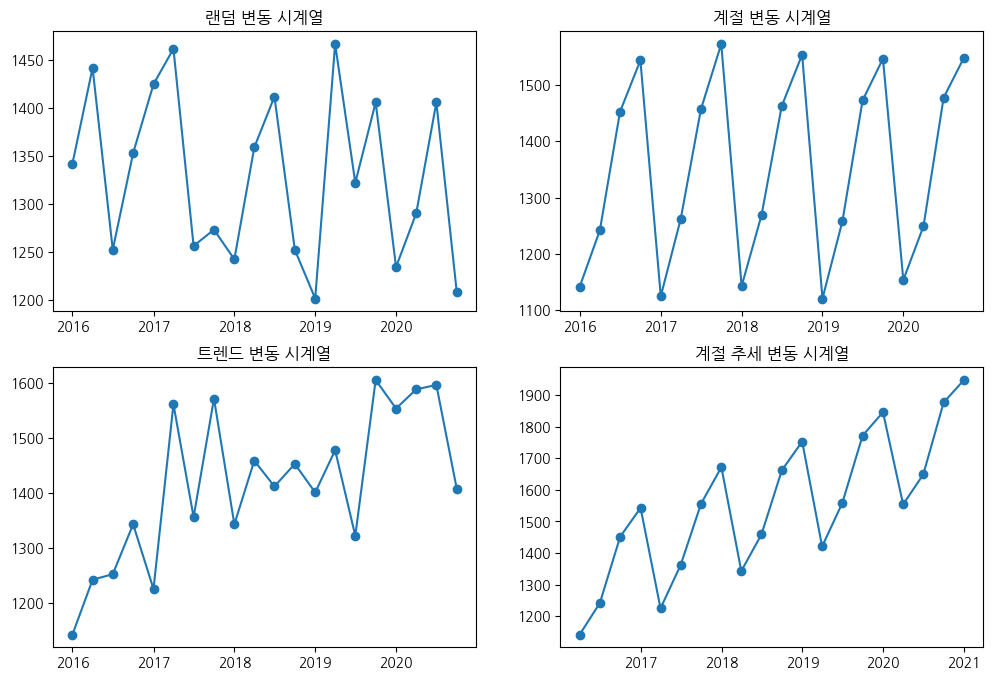

In [34]:
fig, axs = plt.subplots(2, 2, figsize = (12, 8))
# 랜덤 변동 시계열
axs[0, 0].plot(dd_ts.index, dd_ts['value'], marker = 'o')
axs[0, 0].set_title('랜덤 변동 시계열')

# 계절 변동 시계열
axs[0, 1].plot(season1_ts.index, season1_ts['value'], marker = 'o')
axs[0, 1].set_title('계절 변동 시계열')

# 추세 변동 시계열
axs[1, 0].plot(trend_ts.index, trend_ts['value'], marker = 'o')
axs[1, 0].set_title('트렌드 변동 시계열')

# 계절 추세 변동 시계열
axs[1, 1].plot(st1_ts.index, st1_ts.values, marker = 'o')
axs[1, 1].set_title('계절 추세 변동 시계열')

## air passenger 데이터로 시각화해보기

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

In [36]:
# air passenger 데이터로드
airpass_data = get_rdataset('AirPassengers', package = 'datasets')

In [37]:
airpass_ts = pd.Series(airpass_data.data['value'].values,
                    index = pd.date_range(start = '1949-01', periods = len(airpass_data.data), freq = 'ME'))
airpass_ts

1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
             ... 
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432
Freq: ME, Length: 144, dtype: int64

air passenger 데이터 그래프 그리기

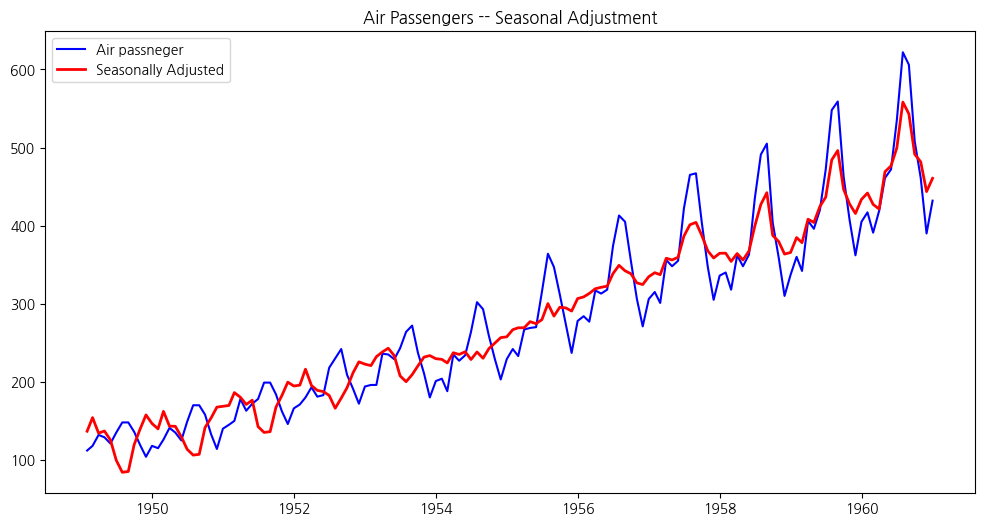

In [38]:
plt.figure(figsize = (12, 6))
plt.plot(airpass_ts, label = 'Air passneger', color = 'blue')
result_airpass = seasonal_decompose(airpass_ts, model = 'additive')
seasonal_adjusted_airpass = airpass_ts - result_airpass.seasonal
plt.plot(seasonal_adjusted_airpass, label = 'Seasonally Adjusted', color = 'red', linewidth = 2)
plt.title('Air Passengers -- Seasonal Adjustment')
plt.legend()
plt.show()

# 차분(difference) : diff
- 현재값에서 과거 값을 빼주는 것
- 변화량을 보는 것


In [52]:
data = {
    'Year': [2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020],
    'Quarter': ['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4', 'Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
    'Value': [1342, 1442, 1252, 1343, 1425, 1362, 1256, 1272, 1243, 1359, 1412, 1253, 1201, 1478, 1322, 1406, 1254, 1289, 1497, 1208]
}
index = pd.date_range(start='2016-01-01', periods=len(data['Year']), freq='QE')
dd_ts = pd.DataFrame(data, index=index)

dd_ts

,Year,Quarter,Value
2016-03-31,2016,Qtr1,1342
2016-06-30,2016,Qtr2,1442
2016-09-30,2016,Qtr3,1252
2016-12-31,2016,Qtr4,1343
2017-03-31,2017,Qtr1,1425
2017-06-30,2017,Qtr2,1362
2017-09-30,2017,Qtr3,1256
2017-12-31,2017,Qtr4,1272
2018-03-31,2018,Qtr1,1243
2018-06-30,2018,Qtr2,1359


### 1차 차분

In [53]:
dd_ts['value_diff'] = dd_ts['Value'].diff()
dd_ts.head()

,Year,Quarter,Value,value_diff
2016-03-31,2016,Qtr1,1342,NaN
2016-06-30,2016,Qtr2,1442,100.0
2016-09-30,2016,Qtr3,1252,-190.0
2016-12-31,2016,Qtr4,1343,91.0
2017-03-31,2017,Qtr1,1425,82.0


### 2차 차분

In [54]:
dd_ts['value_diff2'] = dd_ts['Value'].diff(2)
dd_ts

,Year,Quarter,Value,value_diff,value_diff2
2016-03-31,2016,Qtr1,1342,NaN,NaN
2016-06-30,2016,Qtr2,1442,100.0,NaN
2016-09-30,2016,Qtr3,1252,-190.0,-90.0
2016-12-31,2016,Qtr4,1343,91.0,-99.0
2017-03-31,2017,Qtr1,1425,82.0,173.0
2017-06-30,2017,Qtr2,1362,-63.0,19.0
2017-09-30,2017,Qtr3,1256,-106.0,-169.0
2017-12-31,2017,Qtr4,1272,16.0,-90.0
2018-03-31,2018,Qtr1,1243,-29.0,-13.0
2018-06-30,2018,Qtr2,1359,116.0,87.0


In [55]:
# 분기 열 생성
dd_ts['cycle'] = dd_ts.index.quarter
dd_ts

,Year,Quarter,Value,value_diff,value_diff2,cycle
2016-03-31,2016,Qtr1,1342,NaN,NaN,1
2016-06-30,2016,Qtr2,1442,100.0,NaN,2
2016-09-30,2016,Qtr3,1252,-190.0,-90.0,3
2016-12-31,2016,Qtr4,1343,91.0,-99.0,4
2017-03-31,2017,Qtr1,1425,82.0,173.0,1
2017-06-30,2017,Qtr2,1362,-63.0,19.0,2
2017-09-30,2017,Qtr3,1256,-106.0,-169.0,3
2017-12-31,2017,Qtr4,1272,16.0,-90.0,4
2018-03-31,2018,Qtr1,1243,-29.0,-13.0,1
2018-06-30,2018,Qtr2,1359,116.0,87.0,2


## shift 이전 시점으로 이동 = lag

In [56]:
dd_ts['lagged_value'] = dd_ts['Value'].shift(2)
dd_ts

,Year,Quarter,Value,value_diff,value_diff2,cycle,lagged_value
2016-03-31,2016,Qtr1,1342,NaN,NaN,1,NaN
2016-06-30,2016,Qtr2,1442,100.0,NaN,2,NaN
2016-09-30,2016,Qtr3,1252,-190.0,-90.0,3,1342.0
2016-12-31,2016,Qtr4,1343,91.0,-99.0,4,1442.0
2017-03-31,2017,Qtr1,1425,82.0,173.0,1,1252.0
2017-06-30,2017,Qtr2,1362,-63.0,19.0,2,1343.0
2017-09-30,2017,Qtr3,1256,-106.0,-169.0,3,1425.0
2017-12-31,2017,Qtr4,1272,16.0,-90.0,4,1362.0
2018-03-31,2018,Qtr1,1243,-29.0,-13.0,1,1256.0
2018-06-30,2018,Qtr2,1359,116.0,87.0,2,1272.0


In [57]:
# lagged 데이터의 분기를 나타내는 열 추가
dd_ts['lagged_cycle'] = dd_ts.index.shift(2, freq = 'QE').quarter
dd_ts

,Year,Quarter,Value,value_diff,value_diff2,cycle,lagged_value,lagged_cycle
2016-03-31,2016,Qtr1,1342,NaN,NaN,1,NaN,3
2016-06-30,2016,Qtr2,1442,100.0,NaN,2,NaN,4
2016-09-30,2016,Qtr3,1252,-190.0,-90.0,3,1342.0,1
2016-12-31,2016,Qtr4,1343,91.0,-99.0,4,1442.0,2
2017-03-31,2017,Qtr1,1425,82.0,173.0,1,1252.0,3
2017-06-30,2017,Qtr2,1362,-63.0,19.0,2,1343.0,4
2017-09-30,2017,Qtr3,1256,-106.0,-169.0,3,1425.0,1
2017-12-31,2017,Qtr4,1272,16.0,-90.0,4,1362.0,2
2018-03-31,2018,Qtr1,1243,-29.0,-13.0,1,1256.0,3
2018-06-30,2018,Qtr2,1359,116.0,87.0,2,1272.0,4


C:\Users\5-08\AppData\Local\Temp\ipykernel_5872\2393225037.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


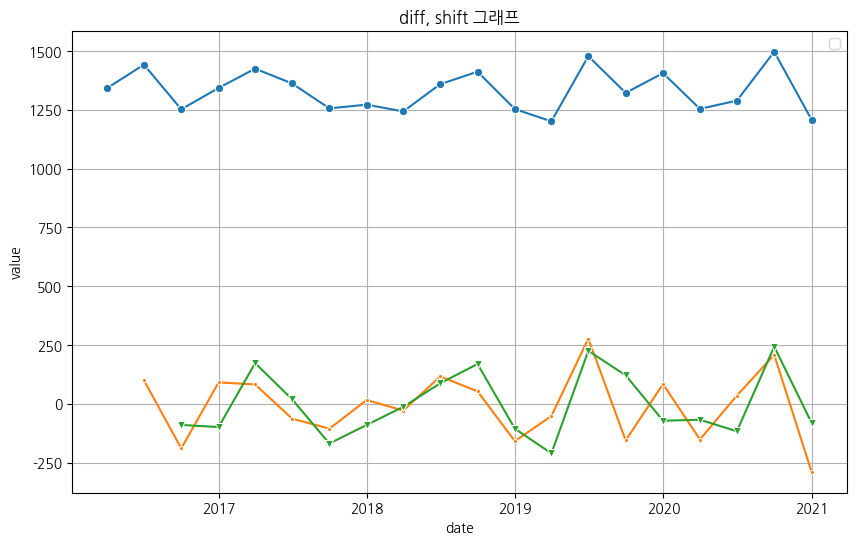

In [64]:
# 차분 데이터 시각화
plt.figure(figsize = (10, 6))
sns.lineplot(x = dd_ts.index, y = dd_ts['Value'], marker = 'o')
sns.lineplot(x = dd_ts.index, y = dd_ts['value_diff'], marker = '.')
sns.lineplot(x = dd_ts.index, y = dd_ts['value_diff2'], marker = 'v')
plt.title('diff, shift 그래프')
plt.xlabel('date')
plt.ylabel('value')
plt.grid(True)
plt.legend()
plt.show()

# 시계열의 합집합 교집합
- 2개의 시계열 데이터가 있을 때 1개로 합치는 것
- 합집합 : 데이터1, 2에 있는 모든 자료를 유지하면서 합침
- 교집합 : 데이터1과 2에 모두 있는 데이터를 합침

In [66]:
data1 = np.arange(1, 25).reshape(8,3)
dates1 = pd.date_range(start = '2019Q1', periods = 8, freq = 'QE')
prod1 = pd.DataFrame(data1, index = dates1, columns = ['web', 'app', 'hybrid'])
prod1

,web,app,hybrid
2019-03-31,1,2,3
2019-06-30,4,5,6
2019-09-30,7,8,9
2019-12-31,10,11,12
2020-03-31,13,14,15
2020-06-30,16,17,18
2020-09-30,19,20,21
2020-12-31,22,23,24


In [67]:
data2 = np.arange(11, 23).reshape(4,3)
dates2 = pd.date_range(start = '2020Q1', periods = 4, freq = 'QE')
prod2 = pd.DataFrame(data2, index = dates2, columns = ['web', 'app', 'hybrid'])
prod2

,web,app,hybrid
2020-03-31,11,12,13
2020-06-30,14,15,16
2020-09-30,17,18,19
2020-12-31,20,21,22


In [71]:
result1 = pd.concat([prod1, prod2]).sort_index()
result1

,web,app,hybrid
2019-03-31,1,2,3
2019-06-30,4,5,6
2019-09-30,7,8,9
2019-12-31,10,11,12
2020-03-31,13,14,15
2020-03-31,11,12,13
2020-06-30,16,17,18
2020-06-30,14,15,16
2020-09-30,19,20,21
2020-09-30,17,18,19


In [72]:
result2 = pd.concat([prod1, prod2], axis = 1).sort_index()
result2

,web,app,hybrid,web,app,hybrid
2019-03-31,1,2,3,NaN,NaN,NaN
2019-06-30,4,5,6,NaN,NaN,NaN
2019-09-30,7,8,9,NaN,NaN,NaN
2019-12-31,10,11,12,NaN,NaN,NaN
2020-03-31,13,14,15,11.0,12.0,13.0
2020-06-30,16,17,18,14.0,15.0,16.0
2020-09-30,19,20,21,17.0,18.0,19.0
2020-12-31,22,23,24,20.0,21.0,22.0


시계열의 교집합

In [73]:
# 교집합 인덱스 계산
common_index = prod1.index.intersection(prod2.index)
common_index

DatetimeIndex(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31'], dtype='datetime64[ns]', freq='QE-DEC')

In [74]:
# 교집합을 기반으로 prod1과 prod2에서 행을 선택
intersect_df1 = prod1.loc[common_index]
intersect_df1

,web,app,hybrid
2020-03-31,13,14,15
2020-06-30,16,17,18
2020-09-30,19,20,21
2020-12-31,22,23,24


In [75]:
# 교집합을 기반으로 prod1과 prod2에서 행을 선택
intersect_df2 = prod2.loc[common_index]
intersect_df2

,web,app,hybrid
2020-03-31,11,12,13
2020-06-30,14,15,16
2020-09-30,17,18,19
2020-12-31,20,21,22


In [79]:
intersect_result = pd.merge(intersect_df1, intersect_df2, how = 'inner', on = intersect_df1.index)
intersect_result

,key_0,web_x,app_x,hybrid_x,web_y,app_y,hybrid_y
0,2020-03-31,13,14,15,11,12,13
1,2020-06-30,16,17,18,14,15,16
2,2020-09-30,19,20,21,17,18,19
3,2020-12-31,22,23,24,20,21,22


# 시계열 자료의 부분 추출 및 수정

In [81]:
# 특정구간 2019년 3분기만 추출
prod1_window = prod1.loc['2019Q2' : '2019Q3']
prod1_window

,web,app,hybrid
2019-06-30,4,5,6
2019-09-30,7,8,9


In [83]:
# 2019년 3분기부터 2020년 2분기까지 데이터 추출
prod1.loc['2019Q3' : '2020Q2']

,web,app,hybrid
2019-09-30,7,8,9
2019-12-31,10,11,12
2020-03-31,13,14,15
2020-06-30,16,17,18


In [89]:
prod2.loc['2020Q3'] = [11,22,33]
prod2

,web,app,hybrid
2020-03-31,11,12,13
2020-06-30,14,15,16
2020-09-30,11,22,33
2020-12-31,20,21,22


# resample 함수 : 시계열 데이터를 새로운 빈도로 재구성하는 함수
- YE : 연말 Year End
- M : 월별 데이터
- W : 주별 데이터

In [90]:
prod1

,web,app,hybrid
2019-03-31,1,2,3
2019-06-30,4,5,6
2019-09-30,7,8,9
2019-12-31,10,11,12
2020-03-31,13,14,15
2020-06-30,16,17,18
2020-09-30,19,20,21
2020-12-31,22,23,24


In [93]:
# 연도별 합계
prod1.resample('YE').sum()

,web,app,hybrid
2019-12-31,22,26,30
2020-12-31,70,74,78


In [96]:
# 반기별로 데이터를 집계 (두 개의 분기를 하나로 묶어 평균 계산)
semi_annual_prod1 = prod1.resample('2QE').mean()
semi_annual_prod1

,web,app,hybrid
2019-03-31,1.0,2.0,3.0
2019-09-30,5.5,6.5,7.5
2020-03-31,11.5,12.5,13.5
2020-09-30,17.5,18.5,19.5
2021-03-31,22.0,23.0,24.0


# 시계열 데이터 EDA
- 상태, 공간 모형(state-space model) : 과거 데이터를 이용해서 현재값, 미래값을 추측
- 필터링(filtering), 스무딩(smoothing) 작업을 하게 됨

## smoothing(평활화)
- 시계열 자료에서 무작위성을 줄이는 기법
- 평활화에 필터링이 포함되기도 함
- 이동평균 평활법(moving average, MA smoothing)
- 지수 평활법(exponential smoothing) : 단순 지수 평활, 이중 지수 평활

### 이동평균 평활법

In [97]:
import statsmodels.api as sm

In [98]:
data = sm.datasets.get_rdataset('AirPassengers', 'datasets')
air_passengers = data.data
air_passengers

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [101]:
air_passengers.index = pd.date_range(start='1949-01', periods = len(air_passengers), freq = 'ME')
air_passengers

,time,value
1949-01-31,1949.000000,112
1949-02-28,1949.083333,118
1949-03-31,1949.166667,132
1949-04-30,1949.250000,129
1949-05-31,1949.333333,121
...,...,...
1960-08-31,1960.583333,606
1960-09-30,1960.666667,508
1960-10-31,1960.750000,461
1960-11-30,1960.833333,390


In [102]:
# 3개월 이동 평균 구하기
ma3 = air_passengers['value'].rolling(window = 3).mean()
ma3

1949-01-31           NaN
1949-02-28           NaN
1949-03-31    120.666667
1949-04-30    126.333333
1949-05-31    127.333333
                 ...    
1960-08-31    587.666667
1960-09-30    578.666667
1960-10-31    525.000000
1960-11-30    453.000000
1960-12-31    427.666667
Freq: ME, Name: value, Length: 144, dtype: float64

In [103]:
# 6개월 이동 평균 구하기
ma6 = air_passengers['value'].rolling(window = 6).mean()
ma6

1949-01-31           NaN
1949-02-28           NaN
1949-03-31           NaN
1949-04-30           NaN
1949-05-31           NaN
                 ...    
1960-08-31    519.166667
1960-09-30    534.000000
1960-10-31    534.000000
1960-11-30    520.333333
1960-12-31    503.166667
Freq: ME, Name: value, Length: 144, dtype: float64

In [104]:
# 12개월 이동 평균 구하기
ma12 = air_passengers['value'].rolling(window = 12).mean()
ma12

1949-01-31           NaN
1949-02-28           NaN
1949-03-31           NaN
1949-04-30           NaN
1949-05-31           NaN
                 ...    
1960-08-31    463.333333
1960-09-30    467.083333
1960-10-31    471.583333
1960-11-30    473.916667
1960-12-31    476.166667
Freq: ME, Name: value, Length: 144, dtype: float64

Text(0.5, 1.0, '12-points moving averge')

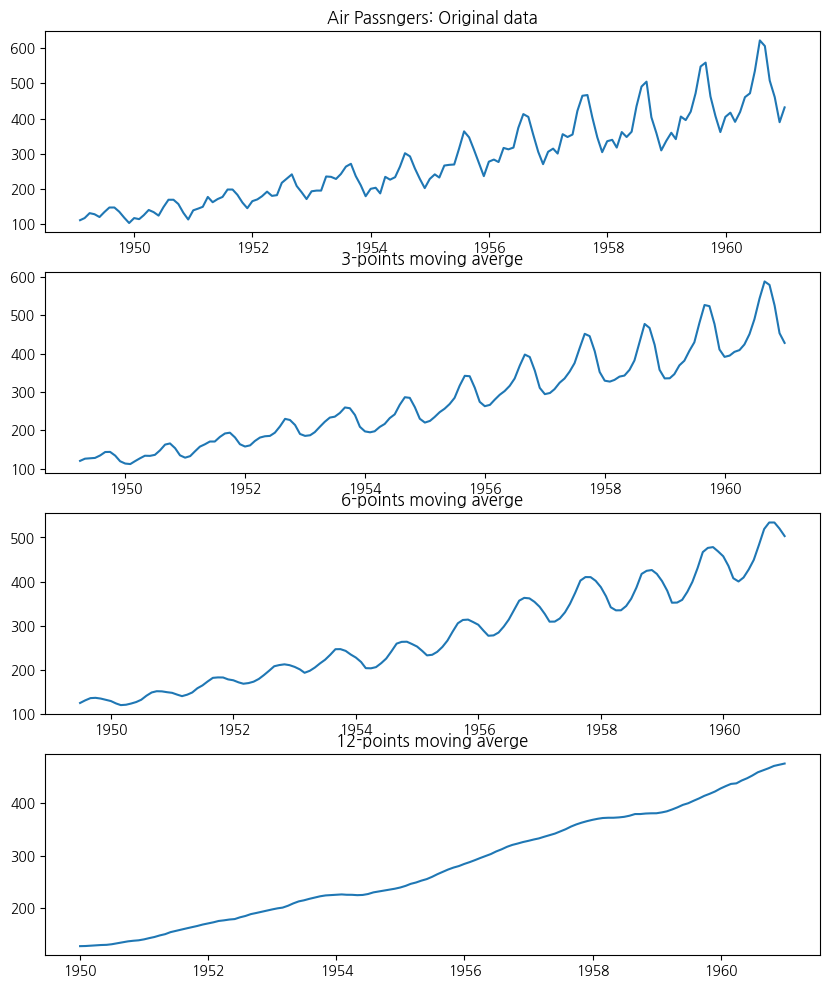

In [107]:
fig, axs = plt.subplots(4, 1, figsize = (10, 12))

# 원본데이터
axs[0].plot(air_passengers.index, air_passengers['value'], label = 'Original data')
axs[0].set_title('Air Passngers: Original data')

# 원본데이터
axs[1].plot(air_passengers.index, ma3, label = '3-points moving averge')
axs[1].set_title('3-points moving averge')

# 원본데이터
axs[2].plot(air_passengers.index, ma6, label = '6-points moving averge')
axs[2].set_title('6-points moving averge')

# 원본데이터
axs[3].plot(air_passengers.index, ma12, label = '12-points moving averge')
axs[3].set_title('12-points moving averge')